# Coagulation Basic 1: PMF Representation

## Direct Implementation for Discrete Particle Size Distributions

In this section, we present a direct implementation of the coagulation process based on the methodology outlined in Seinfeld and Pandis (2006). This notebook is designed to provide a clear understanding of the fundamental code required to simulate particle coagulation, without the abstraction layers provided by more advanced object-oriented approaches.

### Objective

The primary goal is to demonstrate how to calculate the coagulation kernel and the resulting coagulation rates for a given particle size distribution. We will start with a uniform size bin and distribution to establish the basic principles. Then, we will extend this to a more realistic lognormal distribution, which is commonly observed in aerosol science.

### Approach

- **Uniform Distribution**: We first initialize a simple, uniform particle size distribution. This helps in understanding the basic coagulation mechanics.
- **Lognormal Probability Mass Function**: After establishing the basics, we move on to a lognormal size distribution, which better represents real-world aerosol size distributions. Probability mass functions (PMFs) is a bin representation of the lognormal distribution, so the sum of all bins equals total concentration.

This step-by-step approach will provide a foundation for understanding more complex implementations, such as those available in the `particula` library.

### Required Libraries

We will utilize standard scientific libraries such as `numpy` for numerical computations, `matplotlib` for plotting, and `pandas` for data handling. Additionally, we import specific functions from the `particula` library to calculate the coagulation kernel and generate size distributions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# particula imports
from particula.next.dynamics.coagulation import brownian_kernel, rate
from particula.next.particles.properties.lognormal_size_distribution import (
    lognormal_pmf_distribution,
)

# The `brownian_kernel` function calculates the Brownian coagulation kernel,
# which determines the rate at which particles coagulate due to random motion.
# The `rate` function computes the rate of change in particle concentration
# due to the coagulation process.
# The `lognormal_pmf_distribution` function generates a probability mass function
# based on a lognormal size distribution, commonly used to represent aerosol particles.

## Creating a Size Distribution

In this section, we define the size distribution for aerosol particles. The particle sizes are distributed across several bins, allowing us to model the behavior of particles across a wide size range.

### Particle Size Bins

We first define the bins for particle radii using a logarithmic scale. The logarithmic scale (`np.logspace`) is particularly useful when dealing with aerosol particles because their sizes often span several orders of magnitude—from nanometers to micrometers. This approach ensures that we capture the full range of particle sizes with more granularity where it matters.

- **`radius_bins`**: These bins represent the particle radii, ranging from 1 nanometer (1e-9 m) to 10 micrometers (1e-5 m).

### Particle Mass Calculation

Next, we calculate the mass of particles in each size bin. The mass is determined using the formula for the volume of a sphere (`4/3 * π * r^3`), assuming a uniform particle density of 1 g/cm³ (which corresponds to 1000 kg/m³ in SI units).

- **`mass_bins`**: The resulting array contains the masses of particles corresponding to each size bin, which is a key parameter for understanding how these particles will interact and coagulate.

This setup provides a foundation for further analysis of the coagulation process by linking particle size and mass, essential components in determining coagulation rates.


In [2]:
# Create a size distribution for aerosol particles

# Define the bins for particle radius using a logarithmic scale
radius_bins = np.logspace(start=-9, stop=-5, num=10)  # m (1 nm to 10 μm)

# Calculate the mass of particles for each size bin
# The mass is calculated using the formula for the volume of a sphere (4/3 * π * r^3)
# and assuming a particle density of 1 g/cm^3 (which is 1000 kg/m^3 in SI units).
mass_bins = 4 / 3 * np.pi * radius_bins**3 * 1e3  # kg

## Calculating the Brownian Coagulation Kernel

In this section, we calculate the Brownian coagulation kernel matrix, which quantifies the rate at which particles of different sizes collide and coagulate due to Brownian motion. The kernel matrix is central to understanding the dynamics of particle coagulation.

### Kernel Calculation

We use the `brownian_coagulation_kernel_via_system_state` function from the `particula` library to compute the kernel matrix. This function requires the following inputs:

- **`radius_particle`**: The array of particle radii, which we previously defined in `radius_bins`.
- **`mass_particle`**: The corresponding array of particle masses from `mass_bins`.
- **`temperature`**: The ambient temperature, set here to 293.15 K (equivalent to 20°C).
- **`pressure`**: The ambient pressure, set to 101325 Pa (standard atmospheric pressure).
- **`alpha_collision_efficiency`**: A dimensionless factor representing the efficiency of particle collisions, assumed to be 1.0 for perfect efficiency.

The output is a matrix (kernel) where each element represents the coagulation rate between two specific particle sizes.

### Analyzing the Kernel

We print the shape of the kernel matrix to verify its dimensions, which should match the number of radius bins (i.e., it will be a square matrix).

### Creating a DataFrame

To facilitate analysis, we convert the kernel matrix into a `pandas` DataFrame. The DataFrame format allows for easy manipulation and visualization of the data. The rows and columns of the DataFrame are indexed by the particle radii, making it straightforward to identify which particle sizes are interacting.

We then print the first five rows of the DataFrame to inspect the calculated values. This provides a quick glimpse into the interaction rates between the smallest particles.

### Optional: Saving the Kernel Matrix

For further analysis or to share with others, the kernel matrix can be saved as a CSV file. This step is optional but useful if you need to persist the results for future work.


In [3]:
# Calculate the Brownian coagulation kernel matrix

# The Brownian coagulation kernel is calculated using the `brownian_coagulation_kernel_via_system_state` function.
# This function takes into account the particle size, mass, temperature, pressure, and collision efficiency
# to compute the coagulation rates between particles of different sizes.
kernel = brownian_kernel.brownian_coagulation_kernel_via_system_state(
    radius_particle=radius_bins,
    mass_particle=mass_bins,
    temperature=293.15,  # Temperature in Kelvin (20°C)
    pressure=101325,  # Pressure in Pascals (1 atm)
    alpha_collision_efficiency=1.0,  # Assume perfect collision efficiency
)

# Display the shape of the kernel matrix to confirm its dimensions
print(f"Kernel shape: {kernel.shape}")

# Create a pandas DataFrame from the kernel matrix
# The DataFrame allows for easier analysis and visualization of the coagulation kernel.
# Rows and columns are indexed by the particle radius bins, making it clear which sizes are interacting.
df_kernel = pd.DataFrame(kernel, index=radius_bins, columns=radius_bins)

# Print the first 5 rows of the DataFrame to inspect the computed kernel values
df_kernel.head(5)

# Optional: Save the kernel matrix to a CSV file for further analysis or sharing
# df_kernel.to_csv("kernel.csv")

Kernel shape: (10, 10)


,1.000000e-09,2.782559e-09,7.742637e-09,2.154435e-08,5.994843e-08,1.668101e-07,4.641589e-07,1.291550e-06,3.593814e-06,1.000000e-05
1.000000e-09,8.812734e-16,2.277171e-15,1.181152e-14,7.503580e-14,4.506909e-13,2.024284e-12,6.824175e-12,2.020759e-11,5.737860e-11,1.607645e-10
2.782559e-09,2.277171e-15,1.461722e-15,3.692369e-15,1.733024e-14,8.141373e-14,3.005388e-13,9.275265e-13,2.670597e-12,7.517319e-12,2.100038e-11
7.742637e-09,1.181152e-14,3.692369e-15,2.224511e-15,4.558035e-15,1.429060e-14,4.375392e-14,1.267816e-13,3.580220e-13,1.001331e-12,2.790647e-12
2.154435e-08,7.503580e-14,1.733024e-14,4.558035e-15,2.123764e-15,3.008409e-15,7.020882e-15,1.858550e-14,5.087944e-14,1.407135e-13,3.904922e-13
5.994843e-08,4.506909e-13,8.141373e-14,1.429060e-14,3.008409e-15,1.304527e-15,1.624475e-15,3.413800e-15,8.588241e-15,2.303139e-14,6.320152e-14


## Plotting the Brownian Coagulation Kernel

After calculating the Brownian coagulation kernel, the next step is to visualize the results. A plot of the kernel values against the particle radius provides insights into how the coagulation rates vary with particle size.

### Visualization Setup

We use `matplotlib` to create the plot:

- **Figure and Axis**: We begin by creating a figure and an axis object using `plt.subplots()`, which provides a flexible framework for plotting.
- **Kernel Plot**: The kernel values are plotted on the y-axis, and the particle radii on the x-axis. Since the kernel values can span several orders of magnitude, we plot their logarithm (base 10) to better visualize the data.
  
### Axes Configuration

- **X-axis**: The x-axis represents the particle radius in meters. Given the wide range of particle sizes, we use a logarithmic scale (`set_xscale("log")`) to evenly distribute the data across the axis.
- **Y-axis**: The y-axis represents the logarithm of the kernel values (`Log10(Kernel)`). This choice makes it easier to observe trends and differences in the coagulation rates across different particle sizes.

### Optional Y-axis Logarithmic Scale

If a deeper examination of the kernel's range is required, the y-axis can also be set to a logarithmic scale by uncommenting the `ax.set_yscale("log")` line. This is useful when the kernel values span several orders of magnitude and need to be visualized more clearly.


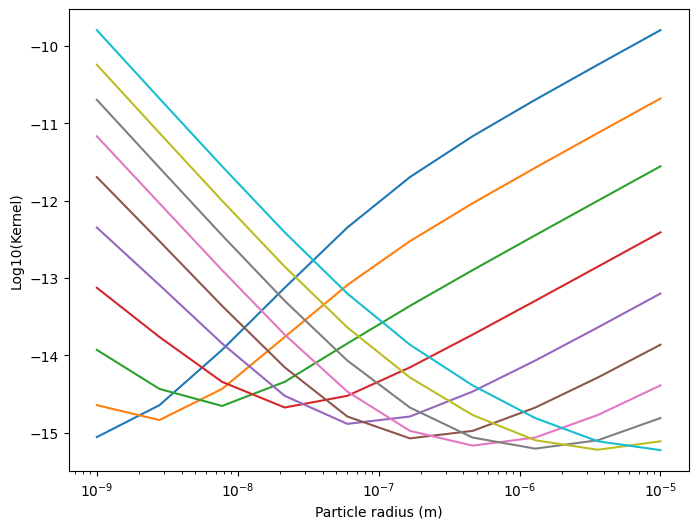

In [4]:
# Plot the Brownian coagulation kernel

# Create a figure and axis object using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the kernel values against the particle radius bins
# The kernel values are plotted on a logarithmic scale (log10) for better visualization.
ax.plot(radius_bins, np.log10(kernel))

# Set the x-axis label to indicate the particle radius in meters
ax.set_xlabel("Particle radius (m)")

# Set the y-axis label to indicate the logarithm of the kernel values
ax.set_ylabel("Log10(Kernel)")

# Use a logarithmic scale for the x-axis to properly represent the wide range of particle sizes
ax.set_xscale("log")

# Optionally, the y-axis can also be set to a logarithmic scale if needed
# ax.set_yscale("log")

# Display the plot
plt.show()

## Adding Particle Concentrations

Now that we have calculated the Brownian coagulation kernel, the next step is to introduce the particle concentrations. While the coagulation kernel itself does not depend on the particle concentration, the concentrations are critical when calculating the actual rate of coagulation, as they determine how many particles are available to interact.

### Initial Concentration Setup

We define an initial particle concentration for each size bin:

- **Uniform Concentration**: In this example, we set a uniform concentration across all size bins. Specifically, we assign a concentration of 100 particles per cubic centimeter (100 cm^-3), which converts to 100 million particles per cubic meter (100 * 1e6 m^-3). This concentration is representative of a typical ambient particle concentration in the atmosphere.

### Visualization of the Initial Concentration

To better understand the initial distribution of particle concentrations, we plot these values against the particle radius:

- **X-axis**: The x-axis represents the particle radius in meters, using a logarithmic scale to cover the wide range of particle sizes.
- **Y-axis**: The y-axis shows the particle concentration in particles per cubic meter (m^-3), also plotted on a logarithmic scale. The logarithmic scales on both axes allow us to clearly see the distribution across several orders of magnitude, which is common in aerosol science.

### Importance of Concentration

While the kernel function determines the rate at which particles of different sizes


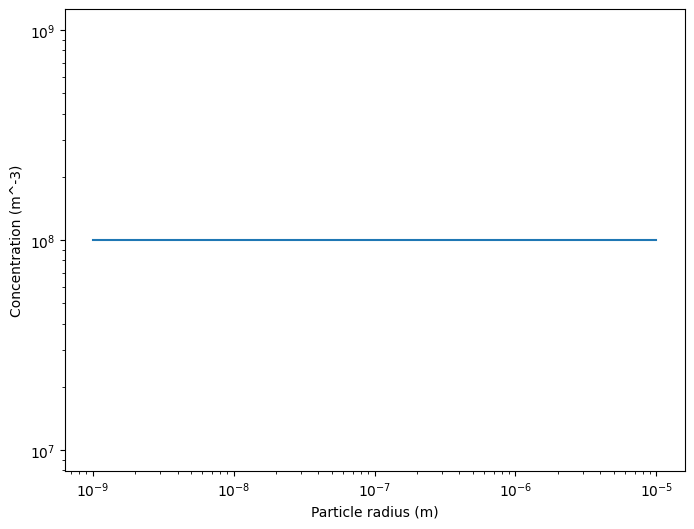

In [5]:
# Define the initial particle concentration

# Set the initial concentration for each size bin
# The concentration is set uniformly across all bins at 100 particles per cubic centimeter (100 cm^-3),
# which is equivalent to 100 * 1e6 particles per cubic meter (m^-3).
concentration_0 = np.ones_like(radius_bins) * 100 * 1e6  # m^-3

# Plot the initial concentration distribution

# Create a figure and axis object for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the concentration against the particle radius
ax.plot(radius_bins, concentration_0)

# Set the x-axis label to indicate the particle radius in meters
ax.set_xlabel("Particle radius (m)")

# Set the y-axis label to indicate the concentration in particles per cubic meter
ax.set_ylabel("Concentration (m^-3)")

# Use a logarithmic scale for both the x-axis and y-axis
# This is because the concentration distribution is typically viewed across several orders of magnitude
ax.set_xscale("log")
ax.set_yscale("log")

# Display the plot
plt.show()

## Coagulation Rate Calculation

With the coagulation kernel and initial concentrations defined, we can now calculate the rates at which particles are gained, lost, and the net change due to coagulation. These rates are essential for understanding how the particle size distribution evolves over time as particles collide and coagulate.

### Gain, Loss, and Net Rate Calculation

- **Gain (`discrete_gain`)**: This function calculates the rate at which particles are gained in each size bin due to coagulation. Gain occurs when two smaller particles collide to form a larger particle, increasing the concentration in the corresponding size bin.
  
- **Loss (`discrete_loss`)**: This function calculates the rate at which particles are lost from each size bin due to coagulation. Loss happens when particles in a particular size bin collide with other particles, thereby decreasing the concentration in that bin.
  
- **Net Rate**: The net rate is the difference between the gain and loss for each size bin (`net_0 = gain_0 - loss_0`). It represents the overall change in concentration for each particle size due to coagulation.

### Displaying Results

We create a `pandas` DataFrame to organize and display the gain, loss, and net coagulation rates for each particle size bin. The DataFrame is indexed by particle radius, which makes it easy to understand the changes in concentration across different sizes.

- **Gain**: The rate at which particles are added to each bin due to coagulation.
- **Loss**: The rate at which particles are removed from each bin due to coagulation.
- **Net**: The overall change in concentration for each bin.

Finally, we display the first five rows of the DataFrame to inspect the initial values for gain, loss, and net change. This provides a quick look at how coagulation is expected to alter the particle size distribution in the system.

By analyzing these rates, we can predict the dynamic behavior of the aerosol particles over time, as smaller particles merge to form larger ones or disappear from the system.



In [6]:
# Coagulation rate calculation

# Calculate the gain, loss, and net change in particle concentration due to coagulation
# `discrete_gain`: Calculates the rate at which particles are gained due to coagulation
# `discrete_loss`: Calculates the rate at which particles are lost due to coagulation
gain_0 = rate.discrete_gain(concentration_0, kernel)
loss_0 = rate.discrete_loss(concentration_0, kernel)
net_0 = gain_0 - loss_0  # Net change in concentration

# Create a DataFrame to display the gain, loss, and net coagulation rates
# The DataFrame is indexed by particle radius bins for clarity
df = pd.DataFrame(
    data={"Gain": gain_0, "Loss": loss_0, "Net": net_0}, index=radius_bins
)

# Display the first 5 rows of the DataFrame
df.head(5)

,Gain,Loss,Net
1.000000e-09,0.000000,2.477398e+06,-2.477398e+06
2.782559e-09,8.812734,3.252254e+05,-3.252165e+05
7.742637e-09,37.388926,4.357112e+04,-4.353373e+04
2.154435e-08,177.283977,7.097477e+03,-6.920193e+03
5.994843e-08,990.478397,6.505676e+03,-5.515198e+03


## Plotting the Coagulation Gain, Loss, and Net Rates

After calculating the coagulation rates, it's crucial to visualize how these rates vary across different particle sizes. This plot will show the gain, loss, and net rates of particle concentration as a function of particle radius.

### Plot Details

- **Net Rate**: The net rate of change in particle concentration is plotted as a thick gray line. This line highlights the overall effect of coagulation, showing whether the concentration in each size bin is increasing or decreasing.
- **Gain Rate**: The gain rate is plotted in dark green. This line shows how particles are being added to each size bin as smaller particles coagulate to form larger ones.
- **Loss Rate**: The loss rate is plotted in red. To make it visually distinct and indicate that it's a removal process, the loss rate is plotted as `-1 * loss_0`. This negative value reflects the decrease in particle concentration due to coagulation.

### Axes Configuration

- **X-axis**: The x-axis represents the particle radius in meters, plotted on a logarithmic scale. This scale is essential for accurately representing the wide range of particle sizes, from nanometers to micrometers.
  
- **Y-axis**: The y-axis shows the rate of change in concentration, with units of `m⁻³ s⁻¹`, indicating how quickly particles are being gained, lost, or changing net concentration in the system.

### Interpretation

By analyzing this plot, you can determine which particle sizes are most affected by coagulation. For instance, sizes where the net rate is positive indicate that coagulation is leading to an increase in concentration, while negative values suggest a decrease. This visualization is crucial for understanding the evolution of the particle size distribution over time.


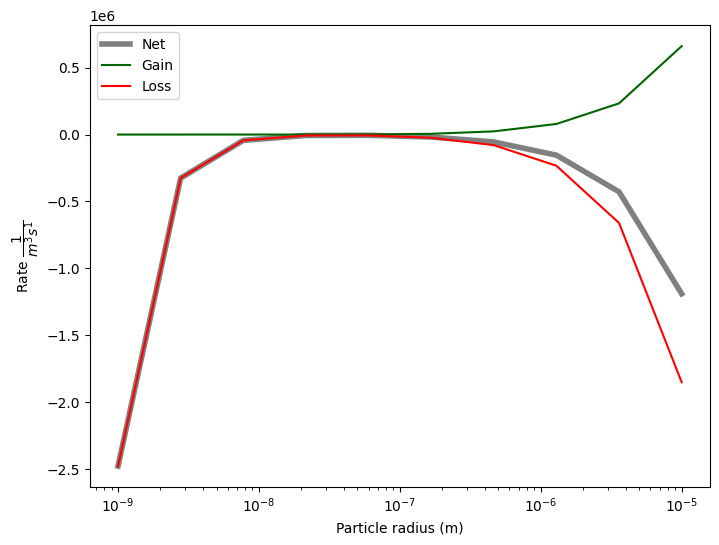

In [7]:
# Plot the coagulation gain, loss, and net rates

# Create a figure and axis object for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the net coagulation rate
# The net rate is plotted with a thicker gray line for emphasis
ax.plot(radius_bins, net_0, label="Net", color="gray", linewidth=4)

# Plot the gain rate
# The gain rate is plotted in dark green
ax.plot(radius_bins, gain_0, label="Gain", color="darkgreen")

# Plot the loss rate
# The loss rate is plotted in red, and multiplied by -1 for plotting to indicate that it's a removal process
ax.plot(radius_bins, -1 * loss_0, label="Loss", color="red")

# Set the x-axis label to indicate the particle radius in meters
ax.set_xlabel("Particle radius (m)")

# Set the y-axis label to indicate the rate of change in concentration, with appropriate units
ax.set_ylabel(r"Rate $\dfrac{1}{m^{3} s^{1}}$")

# Use a logarithmic scale for the x-axis to account for the wide range of particle sizes
ax.set_xscale("log")

# Add a legend to the plot to identify the gain, loss, and net lines
plt.legend()

# Display the plot
plt.show()

## Simulating the Coagulation Process Over Time

In this section, we manually simulate the coagulation process over a few discrete time steps. This manual simulation allows us to observe how particle concentrations evolve as a result of coagulation.

### Simulation Setup

- **Time Step**: We define a time step of 10 seconds (`TIME_STEP = 10`). This value represents the interval at which we update the particle concentrations based on the coagulation rates.

### Time Step 1

1. **Calculate Gain and Loss**: Using the initial concentration (`concentration_0`), we calculate the gain and loss rates using the coagulation kernel.
2. **Net Rate**: The net rate of change in concentration is determined by subtracting the loss from the gain.
3. **Update Concentration**: The concentration is updated by adding the net rate multiplied by the time step to the initial concentration, resulting in `concentration_1`.

### Time Step 2

1. **Recalculate Gain and Loss**: With the updated concentration from time step 1 (`concentration_1`), we recalculate the gain and loss rates.
2. **Net Rate**: Again, we calculate the net rate of change.
3. **Update Concentration**: The concentration is updated to `concentration_2` using the same method as in time step 1.

### Time Step 3

1. **Recalculate Gain and Loss**: We perform the same calculations with the concentration from time step 2 (`concentration_2`).
2. **Update Concentration**: The concentration is updated to `concentration_3`.

### Observing Changes

We print the maximum concentration at each time step to observe how the distribution evolves due to coagulation. This can provide insights into how quickly particles are coalescing into larger sizes or being depleted.

### DataFrame Creation

The concentrations at each time step are combined into a `pandas` DataFrame, making it easier to compare how the distribution changes over time. We display the first few rows to inspect these changes.

### Optional: Saving Results

The concentration data can be saved to a CSV file for further analysis or visualization, allowing you to track the evolution of particle concentrations over time.

### Interpretation

By manually simulating the coagulation process, we can see the step-by-step changes in particle concentrations. This approach highlights the dynamic nature of coagulation and how it impacts particle size distributions in aerosols over time.


In [8]:
# Simulating the coagulation process over time manually

# Define the time step for the simulation
TIME_STEP = 10  # seconds

# Time step 1: Calculate the gain, loss, and net rate, then update concentration

# Calculate the rate of change in concentration (gain and loss) for the initial concentration
gain = rate.discrete_gain(concentration_0, kernel)
loss = rate.discrete_loss(concentration_0, kernel)
net = gain - loss  # Net rate of change

# Update the concentration for the next time step
concentration_1 = concentration_0 + net * TIME_STEP

# Time step 2: Recalculate rates with the updated concentration and update again

# Recalculate gain and loss based on the updated concentration from time step 1
gain = rate.discrete_gain(concentration_1, kernel)
loss = rate.discrete_loss(concentration_1, kernel)
net = gain - loss

# Update the concentration for the next time step
concentration_2 = concentration_1 + net * TIME_STEP

# Time step 3: Recalculate rates again and update concentration

# Recalculate gain and loss based on the updated concentration from time step 2
gain = rate.discrete_gain(concentration_2, kernel)
loss = rate.discrete_loss(concentration_2, kernel)
net = gain - loss

# Update the concentration for the next time step
concentration_3 = concentration_2 + net * TIME_STEP

# Print the maximum concentration at each time step to observe changes
print(f"Concentration 0 max: {concentration_0.max()}")
print(f"Concentration 1 max: {concentration_1.max()}")
print(f"Concentration 2 max: {concentration_2.max()}")
print(f"Concentration 3 max: {concentration_3.max()}")

# Combine the concentrations at each time step into a DataFrame for easy comparison
df_concentration = pd.DataFrame(
    {
        "0": concentration_0,
        "1": concentration_1,
        "2": concentration_2,
        "3": concentration_3,
    },
    index=radius_bins,
)

# Display the first five rows of the DataFrame to inspect the concentration changes
df_concentration.head(5)

# Optional: Save the concentration data to a CSV file for further analysis
# df_concentration.to_csv("concentration_uniform_sim.csv")

Concentration 0 max: 100000000.0
Concentration 1 max: 99944848.02161226
Concentration 2 max: 99900104.63596074
Concentration 3 max: 99862518.85187007


,0,1,2,3
1.000000e-09,100000000.0,7.522602e+07,5.823940e+07,4.593897e+07
2.782559e-09,100000000.0,9.674783e+07,9.387880e+07,9.127407e+07
7.742637e-09,100000000.0,9.956466e+07,9.916940e+07,9.880104e+07
2.154435e-08,100000000.0,9.993080e+07,9.986858e+07,9.981107e+07
5.994843e-08,100000000.0,9.994485e+07,9.990010e+07,9.986252e+07


## Plotting the Evolution of Particle Concentration

To visualize how particle concentrations evolve over time due to coagulation, we plot the concentration distributions at different time steps. This allows us to observe the changes in particle size distribution as the coagulation process progresses.

### Plot Details

- **Time Step 0 (`t=0`)**: The initial concentration distribution is plotted as a solid blue line. This serves as the baseline before any coagulation has occurred.
  
- **Time Step 1 (`t=1`)**: After the first time step, the concentration distribution is plotted as a dashed green line. This shows the immediate effect of coagulation on the particle distribution.
  
- **Time Step 2 (`t=2`)**: The concentration distribution at the second time step is plotted as a dash-dot orange line. By this point, we can begin to see more noticeable changes as particles coagulate.
  
- **Time Step 3 (`t=3`)**: Finally, the concentration distribution after the third time step is plotted as a dotted red line, illustrating further evolution of the particle sizes as the coagulation process continues.

### Axes Configuration

- **X-axis**: The x-axis represents the particle radius in meters, and is plotted on a logarithmic scale to capture the wide range of particle sizes.
  
- **Y-axis**: The y-axis shows the concentration in particles per cubic meter (m⁻³), also on a logarithmic scale to reflect the changes in concentration across orders of magnitude.

### Interpretation

As expected, smaller particles tend to coagulate into larger sizes, leading to changes in the overall distribution. This plot provides a visual representation of the dynamic nature of coagulation, making it easier to understand how particle populations evolve in an aerosol system.

The plot provides a visual representation of the dynamic nature of coagulation, making it easier to understand how particle populations evolve in an aerosol system.


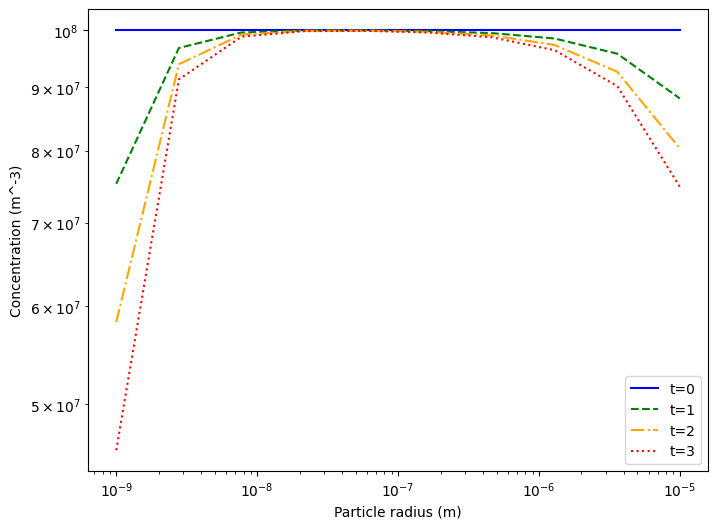

In [9]:
# Plot the evolution of particle concentration over time

# Create a figure and axis object for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the concentration distribution at each time step
ax.plot(radius_bins, concentration_0, label="t=0", linestyle="-", color="blue")
ax.plot(
    radius_bins, concentration_1, label="t=1", linestyle="--", color="green"
)
ax.plot(
    radius_bins, concentration_2, label="t=2", linestyle="-.", color="orange"
)
ax.plot(radius_bins, concentration_3, label="t=3", linestyle=":", color="red")

# Set the x-axis label to indicate the particle radius in meters
ax.set_xlabel("Particle radius (m)")

# Set the y-axis label to indicate the concentration in particles per cubic meter
ax.set_ylabel("Concentration (m^-3)")

# Use logarithmic scales for both the x-axis and y-axis
# This helps in visualizing the broad range of particle sizes and concentration changes
ax.set_xscale("log")
ax.set_yscale("log")

# Add a legend to differentiate between the time steps
plt.legend()

# Display the plot
plt.show()

## Plotting Total Concentration at Each Time Step

To understand the overall effect of coagulation on the particle population, it is useful to track the total concentration of particles over time. This plot shows how the total concentration of particles (summed across all size bins) changes with each time step.

### Plot Details

- **Total Concentration**: The total concentration at each time step is calculated by summing the concentrations across all particle size bins. This value is plotted for each time step to observe how the total particle number in the system evolves.

- **Markers and Line Style**: The plot uses markers (`o`) at each time step to clearly indicate the total concentration, with a solid line connecting these points to show the trend over time.

### Axes Configuration

- **X-axis**: The x-axis represents the time steps, showing the progression of the simulation.
  
- **Y-axis**: The y-axis shows the total concentration of particles in particles per cubic meter ($m^{-3}$), summed across all size bins.

### Interpretation

The plot of total concentration provides insight into how the overall number of particles changes as coagulation proceeds. In a coagulation process, the total number of particles typically decreases over time as particles merge to form larger ones. This reduction in total particle concentration reflects the ongoing aggregation of smaller particles into larger entities.

This visualization helps to quantify the extent of coagulation and provides a clear, high-level view of the process's impact on the particle population.


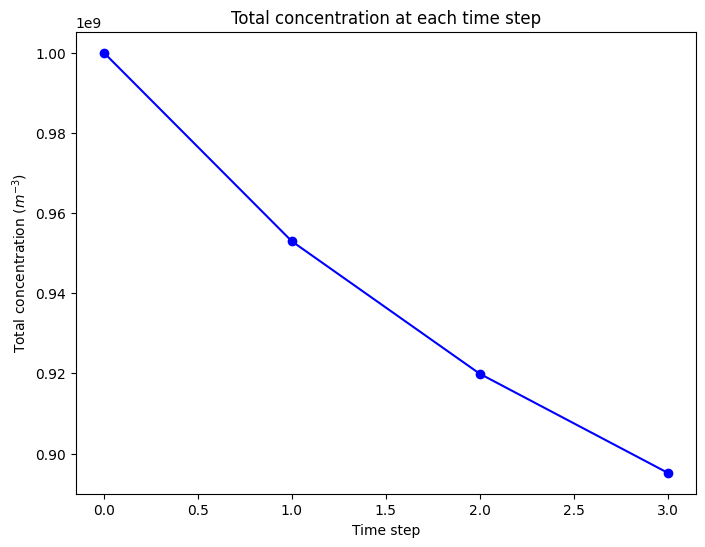

In [10]:
# Plot total concentration at each time step

# Create a figure and axis object for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the total concentration at each time step
ax.plot(
    [
        concentration_0.sum(),
        concentration_1.sum(),
        concentration_2.sum(),
        concentration_3.sum(),
    ],
    label="Total concentration",
    marker="o",  # Add markers to indicate each time step
    linestyle="-",  # Use a solid line to connect the markers
    color="blue",  # Set the line color to blue
)

# Set the x-axis label to indicate the time step
ax.set_xlabel("Time step")

# Set the y-axis label to indicate the total concentration in particles per cubic meter
ax.set_ylabel("Total concentration $(m^{-3})$")

# Set the title of the plot to describe what is being shown
ax.set_title("Total concentration at each time step")

# Display the plot
plt.show()

## Lognormal Distribution

In this section, we will implement the coagulation process for a lognormal particle size distribution. A lognormal distribution is more representative of real-world aerosol systems, where particles are not uniformly distributed in size but instead follow a distribution where most particles are centered around a particular size with fewer particles in the smaller and larger size ranges.

### Why Lognormal Distribution?

A lognormal distribution is often observed in natural aerosol populations due to the multiplicative processes that govern particle formation and growth. This distribution is characterized by a peak (or mode) at the most common particle size, with the number of particles decreasing logarithmically for sizes smaller and larger than the mode. Implementing coagulation for this distribution will provide a more realistic simulation of how aerosol particles behave in the atmosphere.

We will proceed by defining the lognormal size distribution, calculating the coagulation kernel, and then simulating the coagulation process over time, similar to what we did for the uniform distribution. This approach will allow us to compare the results between the uniform and lognormal distributions, highlighting the differences in coagulation dynamics based on initial particle size distributions.

### Defining the Radius and Mass Bins

- **Radius Bins**: We define the particle radius bins on a logarithmic scale ranging from 1 nanometer (1e-9 m) to 10 micrometers (1e-4 m). Using 250 bins ensures a fine resolution across this range, which is important for accurately representing the lognormal distribution.

- **Mass Bins**: The mass of particles in each bin is calculated assuming a density of 1 g/cm³ (1000 kg/m³). This is done using the formula for the volume of a sphere, `4/3 * π * r^3`, multiplied by the density.

### Generating the Lognormal Distribution

- **Lognormal Distribution**: We generate the particle concentration using a lognormal distribution, which is characterized by:
  - A **mode** (most probable size) of 100 nanometers (100 nm).
  - A **geometric standard deviation** of 1.4, which controls the spread of the distribution.
  - A **total number concentration** of 10000 particles per cubic centimeter (10000 cm⁻³), converted to particles per cubic meter for consistency with our units.

### Plotting the Lognormal Distribution

The resulting lognormal distribution is plotted with particle radius on the x-axis (logarithmic scale) and particle concentration on the y-axis. This plot visually demonstrates the lognormal distribution, showing a peak around the mode (100 nm) with concentrations decreasing for both smaller and larger particles.

This setup provides a more realistic starting point for simulating the coagulation process in an aerosol system, as it reflects the natural distribution of particle sizes often observed in the atmosphere.


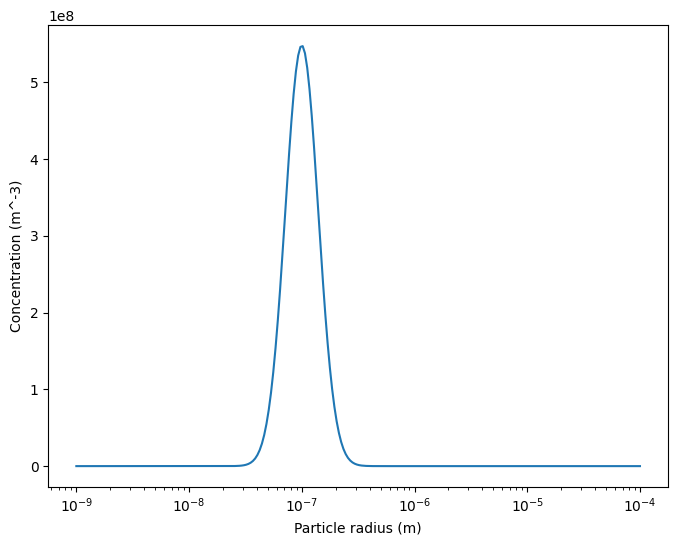

In [11]:
# Define fine scale radius bins and corresponding mass bins for a lognormal distribution

# Create fine scale radius bins on a logarithmic scale from 1 nm to 10 μm
radius_bins = np.logspace(start=-9, stop=-4, num=250)  # m (1 nm to 10 μm)

# Calculate the mass for each particle size bin assuming a density of 1 g/cm^3 (1000 kg/m^3)
mass_bins = 4 / 3 * np.pi * (radius_bins) ** 3 * 1e3  # kg

# Generate a lognormal particle size distribution
# This distribution is characterized by a mode (most probable size) of 100 nm,
# a geometric standard deviation of 1.4, and a total number concentration of 10000 particles per cm^3.
concentration_lognormal_0 = lognormal_pmf_distribution(
    x_values=radius_bins,
    mode=np.array(100e-9),  # Mode of the distribution (100 nm)
    geometric_standard_deviation=np.array(1.4),  # Geometric standard deviation
    number_of_particles=np.array(
        10000 * 1e6
    ),  # Total concentration (10000 cm^-3 converted to m^-3)
)

# Plot the lognormal concentration distribution
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(radius_bins, concentration_lognormal_0)

# Set the x-axis to a logarithmic scale to capture the wide range of particle sizes
ax.set_xlabel("Particle radius (m)")

# Label the y-axis to show the concentration in particles per cubic meter
ax.set_ylabel("Concentration (m^-3)")

# Use a logarithmic scale for the x-axis to better visualize the distribution across particle sizes
ax.set_xscale("log")

# Display the plot
plt.show()

## Simulating the Coagulation Process for a Lognormal Distribution

Having established a lognormal particle size distribution, we now proceed to simulate the coagulation process over time. This simulation will show how the distribution evolves as particles coagulate and form larger particles.

### Simulation Setup

- **Time Step**: We set a time step of 100 seconds (`TIME_STEP = 100`). This interval determines how frequently the particle concentrations are updated based on the calculated coagulation rates.

- **Coagulation Kernel**: The coagulation kernel is calculated using the same parameters as before (temperature, pressure, and perfect collision efficiency). The kernel remains constant throughout the simulation as it only depends on the physical properties of the particles and the environment.

### Time Step Calculations

For each time step, we calculate the gain, loss, and net change in particle concentration:

1. **Time Step 1**:
   - Calculate the gain and loss rates for the initial concentration (`concentration_lognormal_0`).
   - Update the concentration to `concentration_lognormal_1` by applying the net rate of change. Any negative concentrations resulting from numerical errors are set to zero.

2. **Time Step 2**:
   - Recalculate the gain and loss rates based on `concentration_lognormal_1`.
   - Update the concentration to `concentration_lognormal_2` and ensure no negative values.

3. **Time Step 3**:
   - Recalculate the rates again based on `concentration_lognormal_2`.
   - Update the concentration to `concentration_lognormal_3`, correcting any negative values.

### Combining Results

The concentrations at each time step are combined into a `pandas` DataFrame. This structure allows for easy comparison of how the particle size distribution changes over time due to coagulation.

### Optional: Saving Results

The resulting concentration data can be saved to a CSV file for further analysis or visualization. This step is optional but useful for documenting the evolution of the lognormal distribution over time.

### Interpretation

By simulating the coagulation process for a lognormal distribution, we can observe how initially peaked distributions broaden and shift as particles merge. The correction for negative concentrations ensures that the physical constraints of the system (i.e., non-negative particle counts) are respected throughout the simulation.



In [12]:
# Simulating the coagulation process over time for a lognormal distribution

# Define the time step for the simulation
TIME_STEP = 100  # seconds

# Calculate the coagulation kernel
kernel = brownian_kernel.brownian_coagulation_kernel_via_system_state(
    radius_particle=radius_bins,
    mass_particle=mass_bins,
    temperature=293.15,  # Temperature in Kelvin
    pressure=101325,  # Pressure in Pascals (1 atm)
    alpha_collision_efficiency=1.0,  # Assume perfect collision efficiency
)

# Time step 1: Calculate gain, loss, and update concentration
gain = rate.discrete_gain(concentration_lognormal_0, kernel)
loss = rate.discrete_loss(concentration_lognormal_0, kernel)
net = gain - loss
concentration_lognormal_1 = concentration_lognormal_0 + net * TIME_STEP
concentration_lognormal_1[concentration_lognormal_1 < 0] = (
    0  # Ensure no negative concentrations
)

# Time step 2: Recalculate rates and update concentration
gain = rate.discrete_gain(concentration_lognormal_1, kernel)
loss = rate.discrete_loss(concentration_lognormal_1, kernel)
net = gain - loss
concentration_lognormal_2 = concentration_lognormal_1 + net * TIME_STEP
concentration_lognormal_2[concentration_lognormal_2 < 0] = (
    0  # Ensure no negative concentrations
)

# Time step 3: Recalculate rates and update concentration
gain = rate.discrete_gain(concentration_lognormal_2, kernel)
loss = rate.discrete_loss(concentration_lognormal_2, kernel)
net = gain - loss
concentration_lognormal_3 = concentration_lognormal_2 + net * TIME_STEP
concentration_lognormal_3[concentration_lognormal_3 < 0] = (
    0  # Ensure no negative concentrations
)

# Combine the concentrations at each time step into a DataFrame for easy comparison
df_concentration = pd.DataFrame(
    {
        "0": concentration_lognormal_0,
        "1": concentration_lognormal_1,
        "2": concentration_lognormal_2,
        "3": concentration_lognormal_3,
    },
    index=radius_bins,
)

# Optional: Save the concentration data to a CSV file for further analysis
# df_concentration.to_csv("concentration_lognormal_sim.csv")

## Analyzing Concentration Extremes Over Time

To gain insights into how the particle concentrations evolve during the coagulation process, it's important to track the maximum and minimum concentrations at each time step. These values can provide valuable information about the stability and dynamics of the particle distribution.

### Concentration Extremes

We print the maximum and minimum concentrations for each time step:

- **Time Step 0 (`t=0`)**:
  - **Max Concentration**: This represents the highest concentration of particles at the initial distribution.
  - **Min Concentration**: This represents the lowest concentration at the initial distribution.

- **Time Step 1 (`t=1`)**:
  - **Max Concentration**: After the first time step, we observe the highest concentration to see how it compares with the initial state.
  - **Min Concentration**: Similarly, the lowest concentration is noted, which may indicate the depletion of certain particle sizes.

- **Time Step 2 (`t=2`)**:
  - **Max Concentration**: As the simulation progresses, the peak concentration may shift due to ongoing coagulation.
  - **Min Concentration**: Continued tracking of the minimum concentration helps in understanding the impact of coagulation on smaller particle sizes.

- **Time Step 3 (`t=3`)**:
  - **Max Concentration**: The final maximum concentration provides an overview of how the distribution has evolved.
  - **Min Concentration**: The minimum concentration may highlight which particle sizes have been most affected by coagulation.

### Interpretation

By examining these extremes, we can infer the following:

- **Max Concentration**: Changes in the maximum concentration over time can indicate the formation of larger particles as smaller ones coagulate. A decrease in max concentration suggests that the most abundant particle size at earlier steps is merging with others, leading to a broader or shifted distribution.

- **Min Concentration**: The minimum concentration helps identify whether certain particle sizes are becoming scarce due to coagulation, which may cause those bins to empty out or reduce significantly.

This analysis is crucial for understanding the dynamic behavior of the particle size distribution under coagulation and for ensuring that the simulation reflects realistic physical constraints.

In [13]:
# Print the maximum and minimum concentrations at each time step

print(f"Max concentration at t=0: {concentration_lognormal_0.max()}")
print(f"Min concentration at t=0: {concentration_lognormal_0.min()}")

print(f"Max concentration at t=1: {concentration_lognormal_1.max()}")
print(f"Min concentration at t=1: {concentration_lognormal_1.min()}")

print(f"Max concentration at t=2: {concentration_lognormal_2.max()}")
print(f"Min concentration at t=2: {concentration_lognormal_2.min()}")

print(f"Max concentration at t=3: {concentration_lognormal_3.max()}")
print(f"Min concentration at t=3: {concentration_lognormal_3.min()}")

Max concentration at t=0: 547382752.6716477
Min concentration at t=0: 1.6445825598006674e-83
Max concentration at t=1: 547101886.2347279
Min concentration at t=1: 0.0
Max concentration at t=2: 546821186.0640612
Min concentration at t=2: 0.0
Max concentration at t=3: 546540652.1200775
Min concentration at t=3: 0.0


## Plotting the Coagulation Gain, Loss, and Net Rates for Lognormal Distribution

To visualize the dynamics of coagulation for a lognormal particle size distribution, we plot the rates of gain, loss, and net change in concentration across the range of particle sizes. This plot provides insights into how particles are interacting during the coagulation process.

### Plot Details

- **Net Rate**: The net rate of change in particle concentration is plotted as a thick gray line. This line represents the overall effect of coagulation, indicating whether the concentration in each size bin is increasing or decreasing.

- **Gain Rate**: The gain rate, plotted in dark green, shows how particles are being added to each size bin as smaller particles coagulate to form larger ones. This rate reflects the accumulation of particles in specific size bins.

- **Loss Rate**: The loss rate is plotted in red, with the values multiplied by -1 to indicate that it represents a reduction in particle concentration. This line shows how particles are being depleted from each size bin due to coagulation.

### Axes Configuration

- **X-axis**: The x-axis represents the particle radius in meters, plotted on a logarithmic scale to capture the wide range of particle sizes present in the distribution.
  
- **Y-axis**: The y-axis shows the rate of change in concentration in units of particles per cubic meter per second ($\dfrac{1}{m^{3} s^{1}}$), providing a clear view of how rapidly particles are being gained, lost, or changing net concentration in the system.

### Legend and Interpretation

A legend is included to clearly differentiate between the net, gain, and loss lines on the plot. By analyzing these rates, we can determine the most active particle sizes in the coagulation process:

- **Positive Net Rate**: Indicates that the particle size bin is gaining particles, likely due to the aggregation of smaller particles.
- **Negative Net Rate**: Indicates that the particle size bin is losing particles, either because they are merging into larger particles or being depleted through other processes.

This plot is essential for understanding the detailed behavior of the particle size distribution during coagulation, highlighting which sizes are most affected by the process.


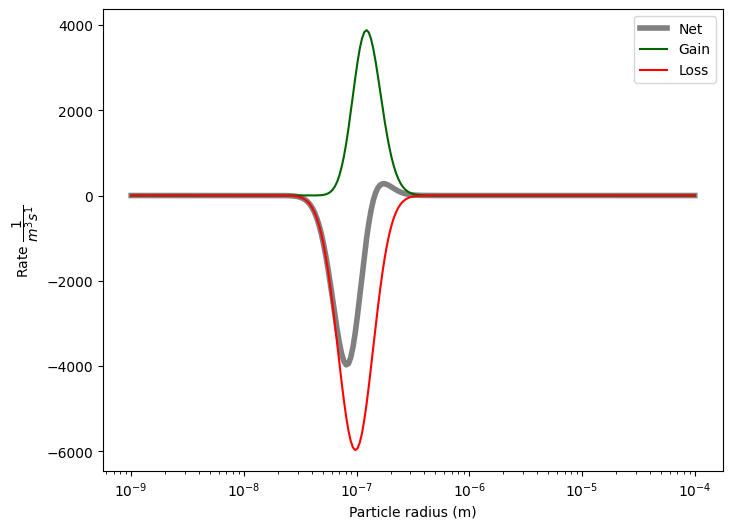

In [14]:
# Plot the coagulation gain, loss, and net rates for the lognormal distribution

# Create a figure and axis object for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the net coagulation rate
# The net rate is plotted with a thicker gray line for emphasis
ax.plot(radius_bins, net, label="Net", color="gray", linewidth=4)

# Plot the gain rate
# The gain rate is plotted in dark green
ax.plot(radius_bins, gain, label="Gain", color="darkgreen")

# Plot the loss rate
# The loss rate is plotted in red, and multiplied by -1 for plotting to indicate that it's a removal process
ax.plot(radius_bins, -1 * loss, label="Loss", color="red")

# Set the x-axis label to indicate the particle radius in meters
ax.set_xlabel("Particle radius (m)")

# Set the y-axis label to indicate the rate of change in concentration, with appropriate units
ax.set_ylabel(r"Rate $\dfrac{1}{m^{3} s^{1}}$")

# Use a logarithmic scale for the x-axis to account for the wide range of particle sizes
ax.set_xscale("log")

# Add a legend to identify the gain, loss, and net lines
plt.legend()

# Display the plot
plt.show()

## Plotting the Evolution of Concentration for Lognormal Distribution

After simulating the coagulation process over several time steps, it is important to visualize how the particle concentration evolves. This plot shows the concentration distribution at different time steps, allowing us to observe the changes in the lognormal distribution as coagulation progresses.

### Plot Details

- **Time Step 0 (`t=0`)**: The initial concentration distribution is plotted as a solid blue line. This represents the starting point of the simulation, with a lognormal distribution centered around the mode.
  
- **Time Step 1 (`t=1`)**: After the first time step, the concentration distribution is plotted as a dashed green line. This line shows the immediate impact of coagulation on the particle sizes.

- **Time Step 2 (`t=2`)**: The concentration distribution at the second time step is plotted as a dash-dot orange line. By this time, noticeable shifts in the distribution may start to appear as particles coagulate.

- **Time Step 3 (`t=3`)**: Finally, the concentration distribution after the third time step is plotted as a dotted red line. This line illustrates further evolution of the distribution, highlighting the ongoing effects of coagulation.

### Axes Configuration

- **X-axis**: The x-axis represents the particle radius in meters, plotted on a logarithmic scale to cover the wide range of particle sizes in the lognormal distribution.
  
- **Y-axis**: The y-axis shows the concentration in particles per cubic meter (m⁻³), also plotted on a logarithmic scale to reflect the broad range of concentrations.

### Interpretation

By comparing the concentration distributions at different time steps, you can observe how the lognormal distribution shifts and broadens as particles coagulate. Typically, the concentration of smaller particles decreases over time as they merge to form larger particles, leading to an increase in the concentration of larger particles. This visualization provides a clear, temporal view of the coagulation process and its effects on the particle size distribution.

This plot is crucial for understanding the dynamic evolution of aerosol particles under coagulation, particularly when starting with a realistic lognormal distribution.


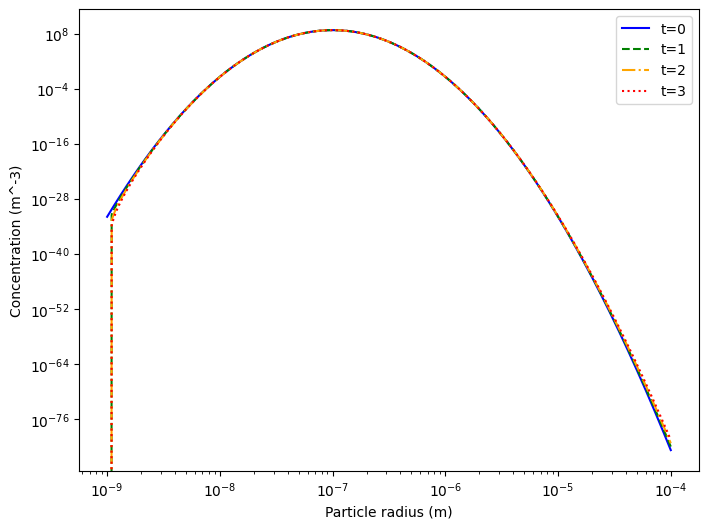

In [15]:
# Plot the evolution of particle concentration over time for the lognormal distribution

# Create a figure and axis object for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the concentration distribution at each time step
ax.plot(
    radius_bins,
    concentration_lognormal_0,
    label="t=0",
    linestyle="-",
    color="blue",
)
ax.plot(
    radius_bins,
    concentration_lognormal_1,
    label="t=1",
    linestyle="--",
    color="green",
)
ax.plot(
    radius_bins,
    concentration_lognormal_2,
    label="t=2",
    linestyle="-.",
    color="orange",
)
ax.plot(
    radius_bins,
    concentration_lognormal_3,
    label="t=3",
    linestyle=":",
    color="red",
)

# Set the x-axis label to indicate the particle radius in meters
ax.set_xlabel("Particle radius (m)")

# Set the y-axis label to indicate the concentration in particles per cubic meter
ax.set_ylabel("Concentration (m^-3)")

# Use a logarithmic scale for both the x-axis and y-axis
# This is essential for visualizing the wide range of particle sizes and concentration changes
ax.set_xscale("log")
ax.set_yscale("log")

# Add a legend to differentiate between the time steps
plt.legend()

# Display the plot
plt.show()

### Summary

In this notebook, we explored the process of particle coagulation in aerosols, focusing on both uniform and lognormal particle size distributions. The notebook provided a step-by-step implementation of the coagulation process, highlighting key concepts and calculations necessary to simulate the dynamic behavior of aerosol particles over time.

#### Key Steps and Findings:

1. **Coagulation Basics**:
   - We began with a uniform particle size distribution to introduce the fundamental concepts of coagulation, including the calculation of the Brownian coagulation kernel and the rates of particle gain, loss, and net change.
   - The initial uniform distribution allowed us to understand the basic mechanics of how particles interact and merge over time.

2. **Transition to Lognormal Distribution**:
   - We then shifted to a more realistic lognormal particle size distribution, which better represents real-world aerosol systems. This distribution was characterized by a mode (most probable particle size), a geometric standard deviation, and a total number concentration.
   - The coagulation process was simulated for this lognormal distribution, with the particle concentrations updated over several discrete time steps.

3. **Simulation and Visualization**:
   - The evolution of the particle size distribution was tracked over time, with plots showing the changes in concentration for different particle sizes. These plots illustrated how smaller particles gradually merge to form larger ones, leading to a shift and broadening of the distribution.
   - The rates of particle gain, loss, and net change were also visualized, providing insights into the most active particle sizes during the coagulation process.

4. **Key Insights**:
   - The notebook demonstrated that coagulation leads to a decrease in the number concentration of smaller particles as they coalesce to form larger particles. This results in a broader size distribution with fewer small particles and an increased concentration of larger particles.
   - The lognormal distribution, due to its realistic representation of aerosol particles, showed more complex dynamics compared to the uniform distribution, emphasizing the importance of starting with an appropriate initial distribution in simulations.

#### Conclusion:

This notebook provided a guide to simulating the coagulation process in aerosol particles, from basic principles to more advanced applications involving realistic size distributions. By comparing the results from uniform and lognormal distributions, we gained a deeper understanding of how particle populations evolve under coagulation, highlighting the critical role of particle size distribution in aerosol dynamics. The methods and visualizations presented here can be extended to further study and analyze aerosol behavior in various environmental and industrial contexts.